# Dataset: *gurlitt*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\gurlitt-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\gurlitt-src.csv',index=False)

In [16]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import nltk
from nltk import FreqDist, word_tokenize

In [17]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\gurlitt-df.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_src_tw', 'cleaned_reply_tw', 'src_sentiment',
       'reply_sentiment', 'reply_emotion'],
      dtype='object')
(164, 14)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw,src_sentiment,reply_sentiment,reply_emotion
0,535386605666979840,43092938,Will Bern's Museum of Fine Arts accept the con...,Thu Nov 20 10:58:08 +0000 2014,NaN,NaN,NaN,NaN,0,bern museum fine art accept controversi gurlit...,NaN,Positive,Neutral,Happy


In [20]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\gurlitt-src.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'src_emotion'],
      dtype='object')
(138, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,src_emotion
0,535386605666979840,43092938,Will Bern's Museum of Fine Arts accept the con...,Thu Nov 20 10:58:08 +0000 2014,0,bern museum fine art accept controversi gurlit...,Positive,Happy


In [21]:
df.isnull().sum()

src_tweet_id          0
src_user_id           0
src_tweet             0
src_date              0
reply_tweet_id      123
reply_user_id       123
reply_tweet         123
reply_date          123
label                 0
cleaned_src_tw        0
cleaned_reply_tw    123
src_sentiment         0
reply_sentiment       0
reply_emotion         0
dtype: int64

In [22]:
df.loc[df.cleaned_reply_tw.isnull(),['reply_tweet','cleaned_reply_tw','reply_sentiment']]

,reply_tweet,cleaned_reply_tw,reply_sentiment
0,NaN,NaN,Neutral
1,NaN,NaN,Neutral
2,NaN,NaN,Neutral
3,NaN,NaN,Neutral
4,NaN,NaN,Neutral
...,...,...,...
157,NaN,NaN,Neutral
158,NaN,NaN,Neutral
159,NaN,NaN,Neutral
160,NaN,NaN,Neutral


- Delete those meaningless responses.

In [23]:
df.dropna(inplace = True)

In [24]:
src_tw_df.isnull().sum()

src_tweet_id      0
src_user_id       0
src_tweet         0
src_date          0
label             0
cleaned_src_tw    0
src_sentiment     0
src_emotion       0
dtype: int64

In [25]:
df1 = pd.merge(df,src_tw_df[['src_tweet_id','src_emotion']],how='right', on='src_tweet_id')
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw,src_sentiment,reply_sentiment,reply_emotion,src_emotion
0,535386605666979840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happy


In [26]:
print("df's shape: ",df.shape)
print("df1's shape: ",df1.shape)
print("src_tw_df's shapes: ", src_tw_df.shape)

df's shape:  (41, 14)
df1's shape:  (164, 15)
src_tw_df's shapes:  (138, 8)


## Sentiment Analysis

### Source Tweet Analysis

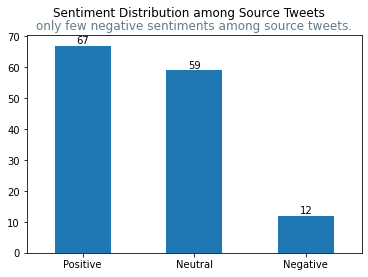

In [39]:
# Souce tweet sentiment analysis
ax = src_tw_df.src_sentiment.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.title('only few negative sentiments among source tweets.',color='#607c8e')
plt.suptitle('Sentiment Distribution among Source Tweets')
plt.xticks(rotation=0)
plt.savefig('D:/論文/PHEME9/Code/graph/gurlitt/src-sentiment.pdf',dpi=300)


  src_sentiment reply_sentiment  count
0      Negative         Neutral      2
1       Neutral        Negative      2
2       Neutral         Neutral      1
3       Neutral        Positive      2
4      Positive        Negative      4
5      Positive         Neutral     12
6      Positive        Positive     18


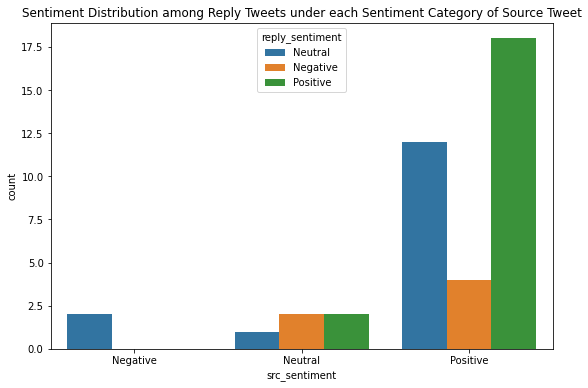

In [69]:
#which sentiment of original posts received most replys
a = pd.DataFrame(df1.groupby(['src_sentiment','reply_sentiment']).size(),columns=['count']).reset_index()
print(a)
plt.figure(figsize=(9,6))
ax = sns.barplot(x = 'src_sentiment', y='count', data = a, hue = 'reply_sentiment')
title='Sentiment Distribution among Reply Tweets under each Sentiment Category of Source Tweet'
ax.set_title(title, loc='center', wrap=True)
plt.savefig('D:/論文/PHEME9/Code/graph/gurlitt/repnsrc-sentiment.pdf',dpi=300)


1. only 2 replied to negative source tweets.
2. Positive source tweets received more positive responses.


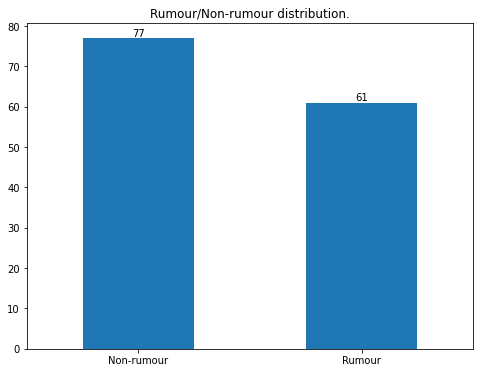

In [70]:
# rumour / non-rumour distribution

plt.figure(figsize=(8,6))
ax = src_tw_df.label.value_counts().plot.bar()
for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
ax.set_xticklabels(['Non-rumour','Rumour'])
plt.title('Rumour/Non-rumour distribution.',fontsize=12)
plt.xticks(rotation=0)

plt.savefig('D:/論文/PHEME9/Code/graph/gurlitt/label.pdf',dpi=300)


   label src_sentiment  count_src
0      0      Negative          9
1      0       Neutral         48
2      0      Positive         20
3      1      Negative          3
4      1       Neutral         11
5      1      Positive         47


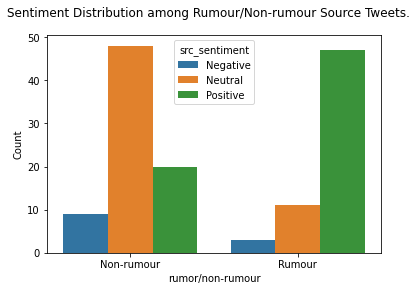

In [73]:
b = pd.DataFrame(src_tw_df.groupby(['label','src_sentiment']).size(),\
                 columns=['count_src']).reset_index()
print(b)
ax = sns.barplot(x = 'label', y='count_src', data = b, hue = 'src_sentiment')
ax.set_xticklabels(['Non-rumour','Rumour'])
plt.xlabel('rumor/non-rumour')
plt.ylabel('Count')
plt.suptitle('Sentiment Distribution among Rumour/Non-rumour Source Tweets.')
plt.savefig('D:/論文/PHEME9/Code/graph/gurlitt/src-label-sentiment.pdf',dpi=300)
# relative_count = a.count_src / a.count_src.sum()
# a['relative_count'] = relative_count

# # print(pd.DataFrame(df.groupby('reply_sentiment').size(),columns=['count']))

- *Analysis:*
1. Rumour tweets showed more positive sentiment.
2. Non-rumour tweets were more neutral.

## Keyword Extraction

### Source Tweet Analysis

In [100]:
src_sen = src_tw_df.cleaned_src_tw.apply(word_tokenize)
src_tw_list = []
for sen in src_sen:
    for token in sen:
        src_tw_list.append(token)

src_tw_doc = " ".join(src_tw_list)

In [180]:
print ("There are {} words in all the source tweets.".format(len(src_tw_list)))

There are 1375 words in all the source tweets.


In [116]:
def n_unique(list1):
    list_set = set(list1)
    unique_list = (list(list_set))
    n = len(unique_list)
    return (n,unique_list)
print ("There are {} unique words in all the source tweets."\
       .format(n_unique(src_tw_list)[0]))

There are 370 unique words in all the source tweets.


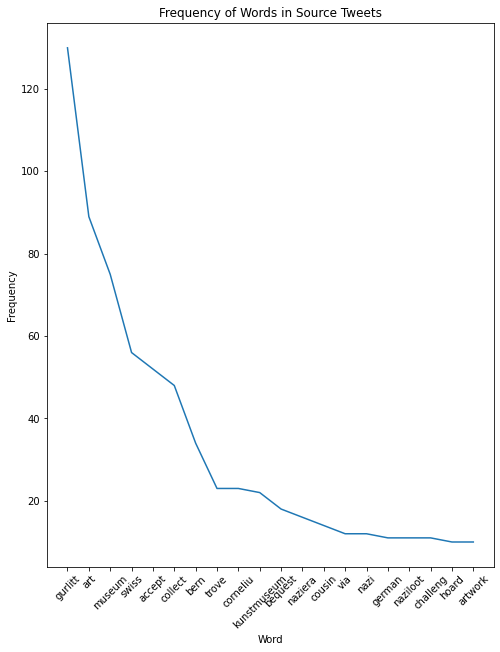

,Word,Frequency
0,gurlitt,130
1,art,89
2,museum,75
3,swiss,56
4,accept,52
5,collect,48
6,bern,34
7,trove,23
8,corneliu,23
9,kunstmuseum,22


In [164]:
freq = FreqDist(src_tw_list)
c = pd.DataFrame(freq.items(),columns = ['Word','Frequency'])\
    .sort_values('Frequency',ascending=False)
c.reset_index(inplace=True,drop=True)

fig = plt.figure(figsize = (8,10))
sns.lineplot(data=c.head(20),x='Word',y='Frequency')   
plt.xticks(rotation=45)
plt.title('Frequency of Words in Source Tweets')
plt.show()    
fig.savefig('D:/論文/PHEME9/Code/graph/gurlitt/freqDist.pdf',dpi=300)
c.head(20)

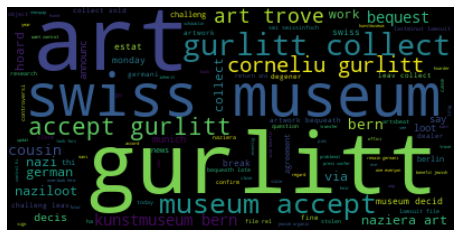

In [199]:
plt.figure(figsize=(8,8))
mywordcloud = WordCloud().generate(src_tw_doc)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
mywordcloud.to_file('D:/論文/PHEME9/Code/graph/gurlitt/src-wordcloud_src.pdf')

### Reply Tweet Analysis

In [172]:
rep_sen = df.cleaned_reply_tw.apply(word_tokenize)
rep_list = []
for sen in rep_sen:
    for token in sen:
        rep_list.append(token)

rep_doc = " ".join(rep_list)

In [179]:
print ("There are {} words in all the reply tweets.".format(len(rep_list)))
print ("There are {} unique words in all the reply tweets."\
       .format(n_unique(rep_list)[0]))

There are 335 words in all the reply tweets.
There are 228 unique words in all the reply tweets.


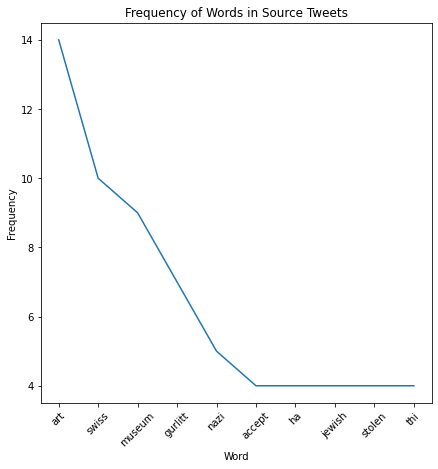

,Word,Frequency
0,art,14
1,swiss,10
2,museum,9
3,gurlitt,7
4,nazi,5
5,accept,4
6,ha,4
7,jewish,4
8,stolen,4
9,thi,4


In [189]:
freq = FreqDist(rep_list)
d = pd.DataFrame(freq.items(),columns = ['Word','Frequency'])\
    .sort_values('Frequency',ascending=False)
d.reset_index(inplace=True,drop=True)

fig = plt.figure(figsize = (7,7))
sns.lineplot(data=d.head(10),x='Word',y='Frequency')   
plt.xticks(rotation=45)
plt.title('Frequency of Words in Source Tweets')
plt.show()    
fig.savefig('D:/論文/PHEME9/Code/graph/gurlitt/rep-freqDist.pdf',dpi=300)
d.head(10)

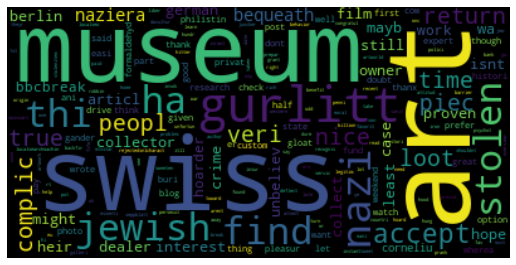

In [200]:
plt.figure(figsize=(9,9))
mywordcloud = WordCloud().generate(rep_doc)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
mywordcloud.to_file('D:/論文/PHEME9/Code/graph/gurlitt/rep-wordcloud_src.pdf')

## Emotion analysis

### Source Tweet Analysis

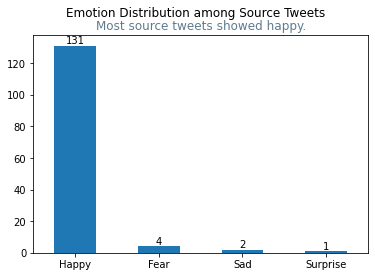

In [166]:
# Emotion analysis
ax = src_tw_df.src_emotion.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.title('Most source tweets showed happy.',color='#607c8e')
plt.suptitle('Emotion Distribution among Source Tweets')
plt.xticks(rotation=0)
plt.savefig('D:/論文/PHEME9/Code/graph/gurlitt/src-emotion.pdf',dpi=300)


### Reply Tweet Analysis

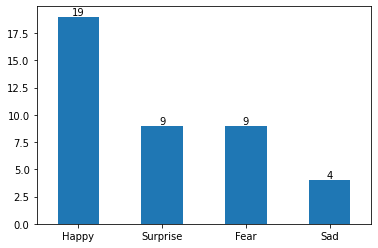

<Figure size 432x288 with 0 Axes>

In [171]:
# Reply sentiment analysis
ax = df.reply_emotion.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.show()
plt.savefig('D:/論文/PHEME9/Code/graph/gurlitt/rep-emotion.pdf',dpi=300)